In [1]:
# standard Python packages for scientific computing:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # plotting
import math as m
import os  # operating system / file utilities
import sys
from copy import deepcopy
from Grid1DCartesian import *
from interpolation_scheme import *
from limiters import *
from ShallowWaterSim import *
import pstats
from pstats import SortKey
import cProfile
from examples import *
from ShallowWaterData import *
    
# from numba import jit
# first did "conda install numba".  See
# https://numba.readthedocs.io/en/stable/user/5minguide.html

In [2]:
# create a subdirectory to hold figures
# (if it doesn't exist already)
os.makedirs("../figs", exist_ok=True)

In [3]:
# default figure size okay if notebook is zoomed for class presentation:
# plt.rcParams["figure.figsize"] = [6.4, 4.8] # default
plt.rcParams["figure.figsize"] = [8.0, 6.0]

In [5]:
print('Python version', sys.version)

Python version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


## Running ShallowWaterSim object

###  Convergence test on simple passive advection problem

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed

The simulation is completed



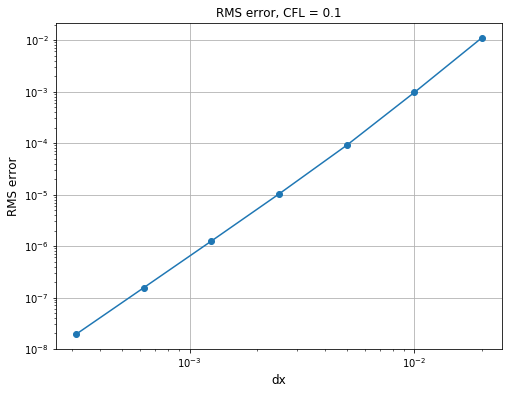

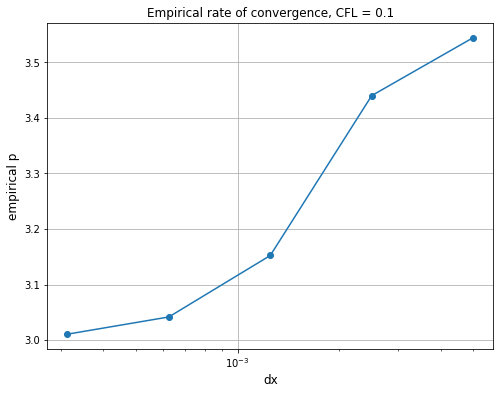

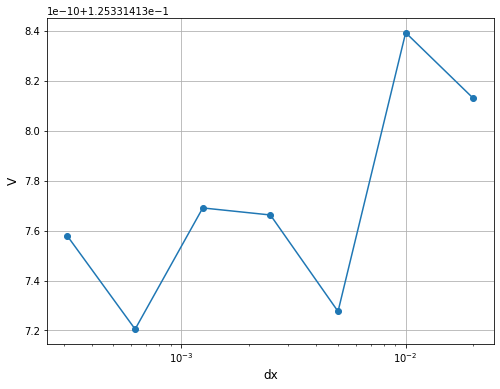

In [4]:
simple_convergence()

### Example from LeVeque (2002) Figure 13.1

The simulation is completed



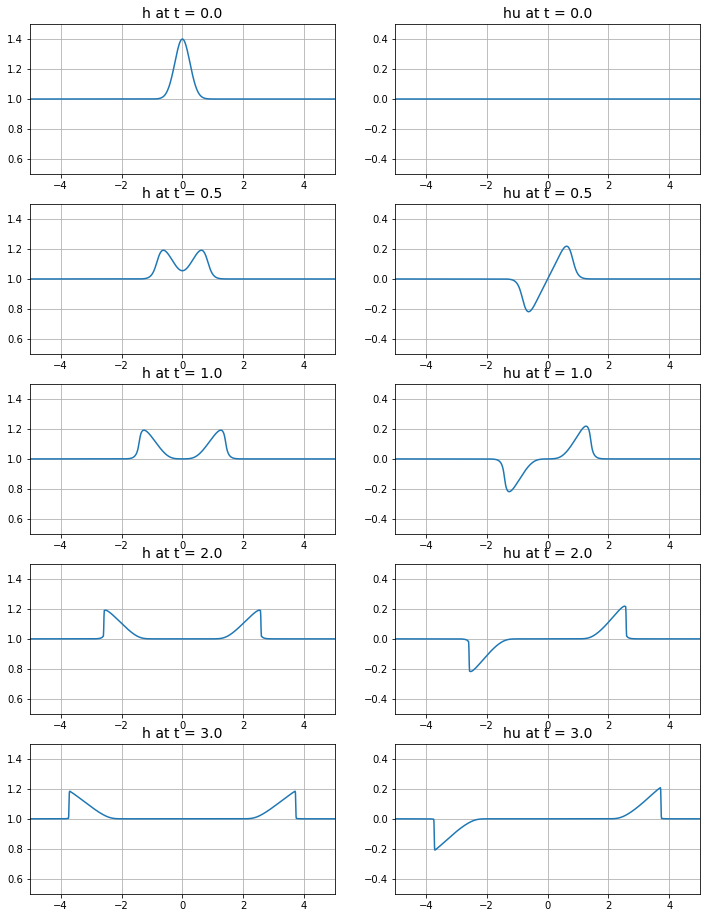

In [9]:
run_LeVeque()

### Wave over a hill (PyClaw Example)
http://www.clawpack.org/gallery/pyclaw/gallery/sill.html

You need to run PyClaw example to generate these plots below. Enjoy the results.

In [12]:
run_sill()

The simulation is completed



In [15]:
path = '../output_sill_5u_SuHu5/files/'

In [16]:
files_mysim = np.sort(os.listdir(path=path))
files_mysim

array(['data_000000.txt', 'data_000835.txt', 'data_001675.txt',
       'data_002496.txt', 'data_003332.txt', 'data_004168.txt',
       'data_004979.txt', 'data_005766.txt', 'data_006552.txt',
       'data_007338.txt', 'data_008123.txt'], dtype='<U15')

In [18]:
for ii in np.sort(files_mysim):
    dd = read_data(path + ii)
    fig = plt.figure()
    plt.plot(dd[3],dd[5],'-',label='surface')
    plt.plot(dd[3],dd[4],'-',label='bottom')
    plt.ylim((-1.05,0.105))
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/'+ii[:-4]+'.jpg')
    plt.close()

In [19]:
os.makedirs("../figs_PyClaw", exist_ok=True)

In [20]:
path_sill_clawpack = '../../clawpack/_output_sill/'
files = os.listdir(path=path_sill_clawpack)
bata = np.genfromtxt('../../clawpack/_output_sill/fort.a0000', skip_header = 6)

#for ii, file  in enumerate(np.sort(files)[12:23]):
#    # CLAWPACK
#    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
#    x = np.linspace(-1,1,501)
#    x = (x[1:]+x[:-1])/2
#    plt.plot(x, data[:,0]+bata, '-', label='surface')
#    plt.plot(x, bata, '-', label='bottom')
#    plt.ylim((-1.05,0.105))
#    plt.xlabel('x (m)')
#    plt.ylabel('z (m)')
#    plt.title('time = %.3f s' % (0.1 * ii))
#    plt.grid()
#    plt.savefig('../figs_PyClaw/'+files_mysim[ii][:-4]+'.jpg')
#    plt.show()

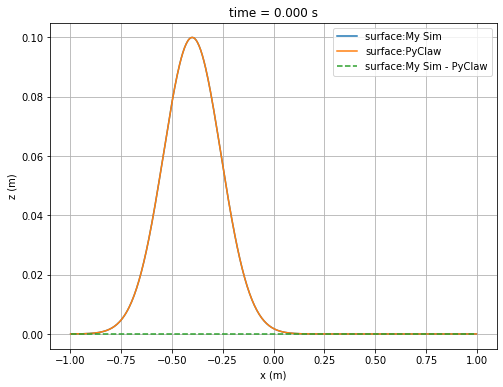

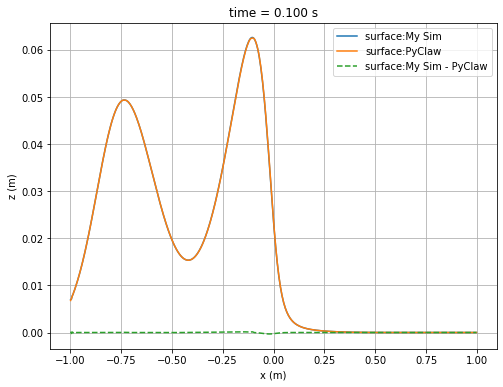

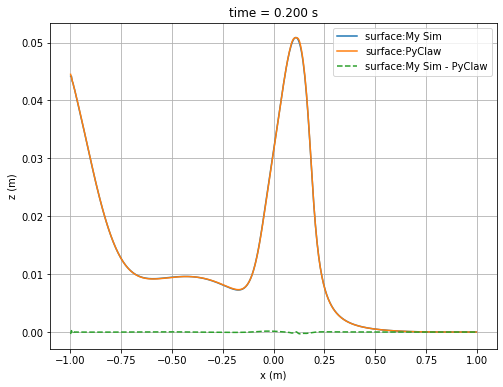

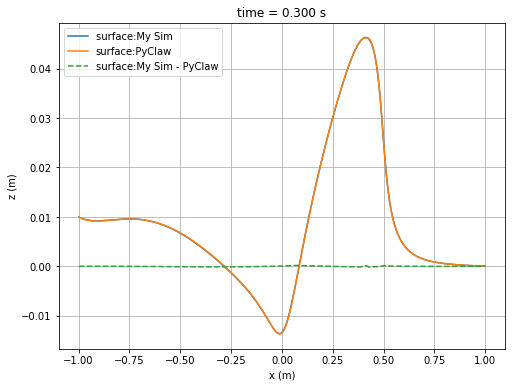

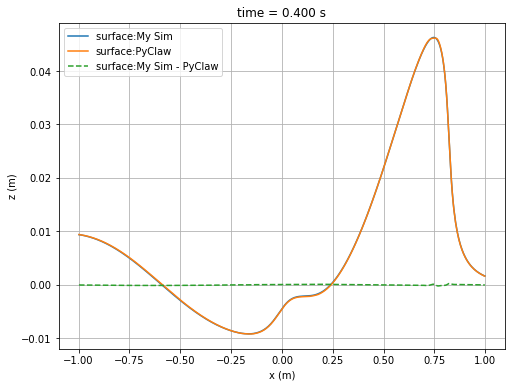

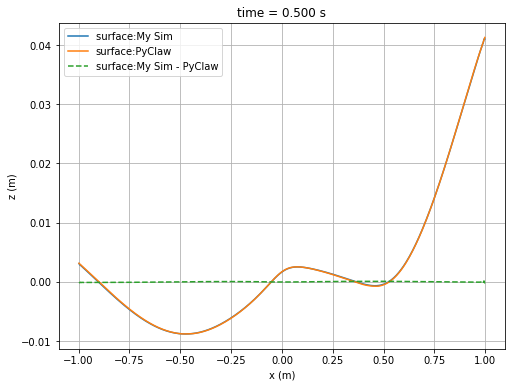

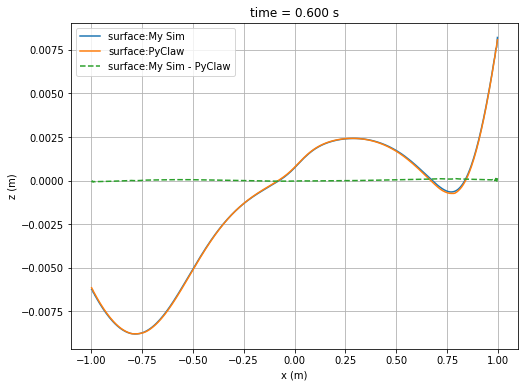

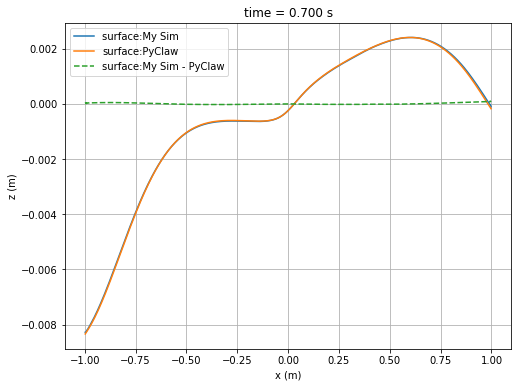

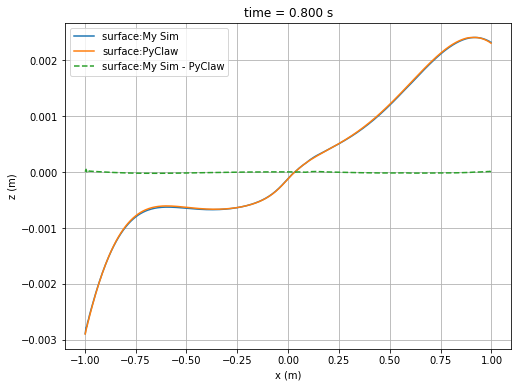

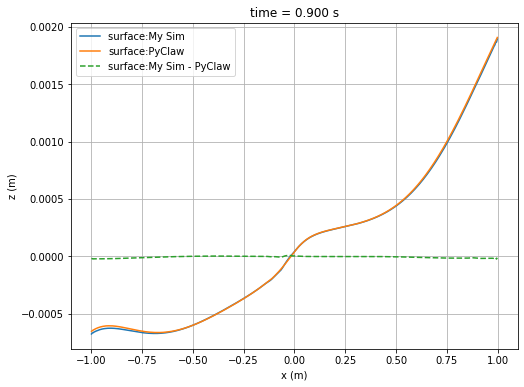

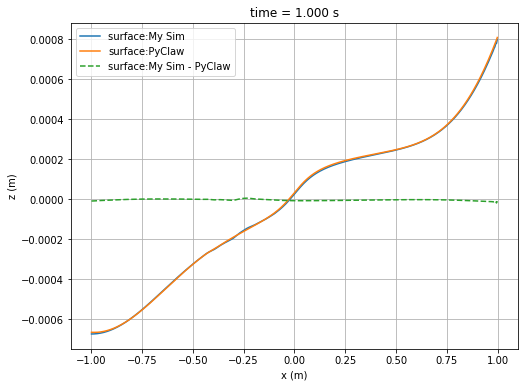

In [21]:
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    #SHALLOWWATERSIM
    dd = read_data(path + np.sort(files_mysim)[ii])
    fig = plt.figure()
    plt.plot(dd[3],dd[5],'-',label='surface:My Sim')
    plt.plot(dd[3],(data[:,0]+bata),'-',label='surface:PyClaw')
    plt.plot(dd[3],dd[5] - (data[:,0]+bata),'--',label='surface:My Sim - PyClaw')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/surface_'+np.sort(files_mysim)[ii][:-4]+'.jpg')
    plt.show()

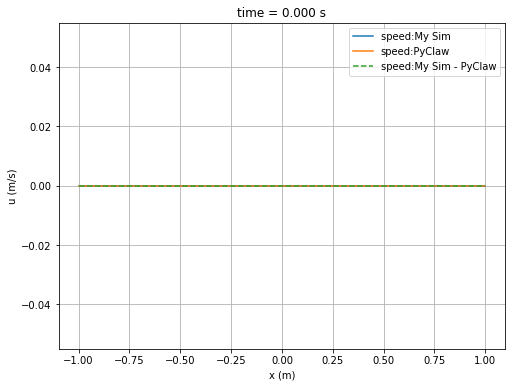

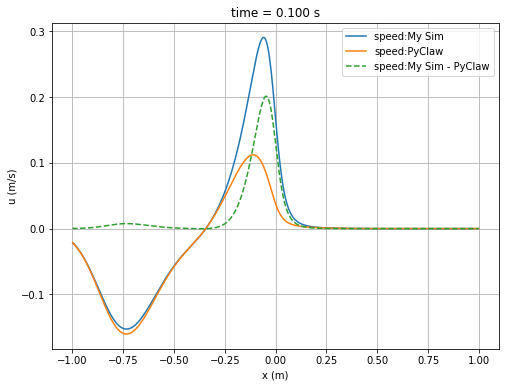

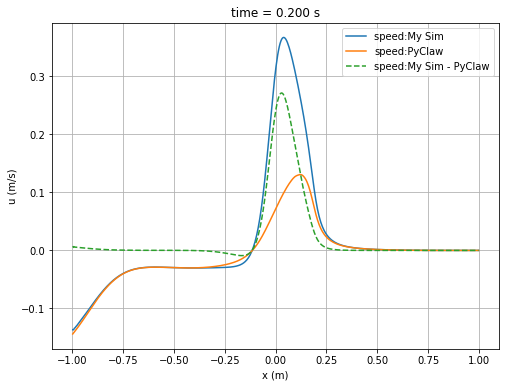

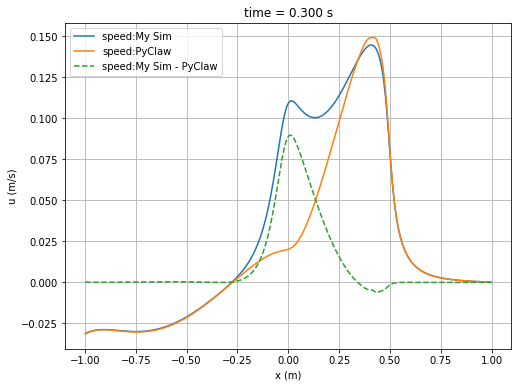

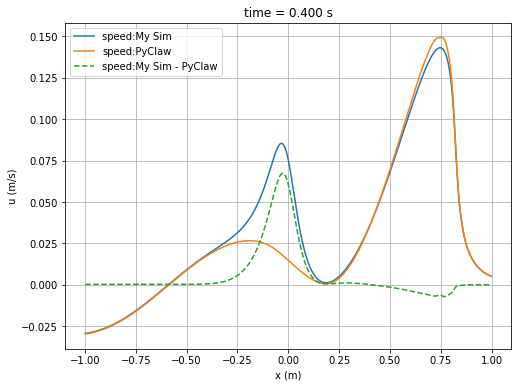

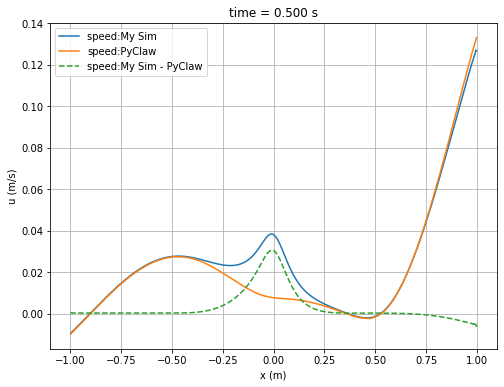

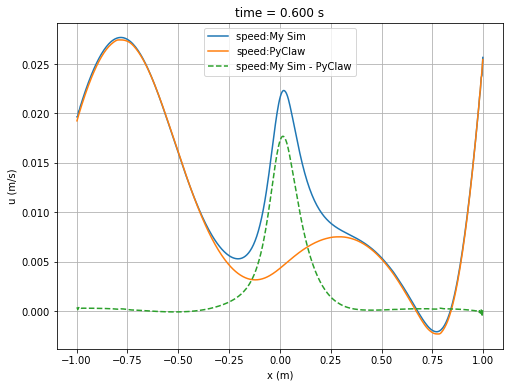

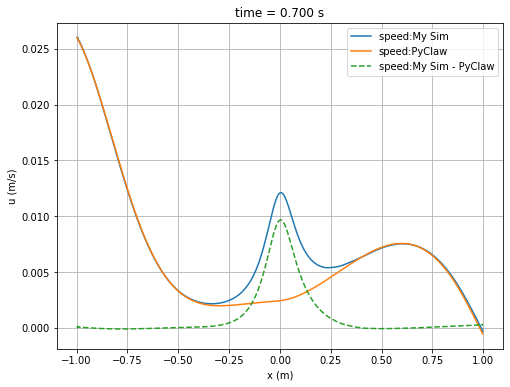

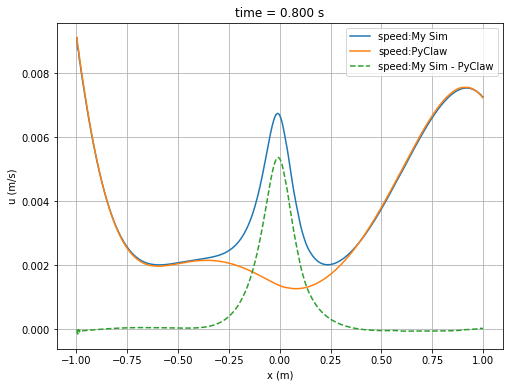

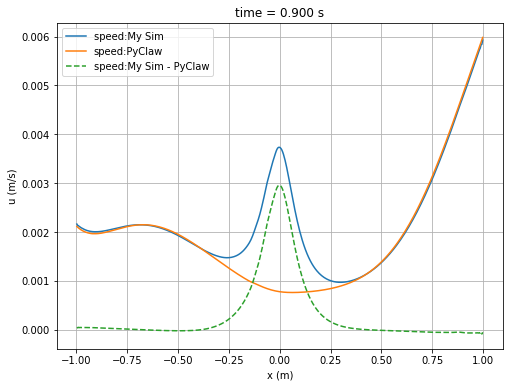

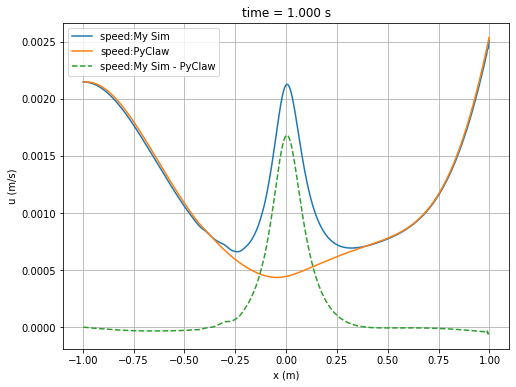

In [22]:
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    #SHALLOWWATERSIM
    dd = read_data(path + np.sort(files_mysim)[ii])
    fig = plt.figure()
    plt.plot(dd[3],dd[6],'-',label='speed:My Sim')
    plt.plot(dd[3],data[:,1],'-',label='speed:PyClaw')
    plt.plot(dd[3],dd[6] - data[:,1],'--',label='speed:My Sim - PyClaw')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/speed_'+np.sort(files_mysim)[ii][:-4]+'.jpg')
    plt.show()